<img src="../../share/skience2020_logo.png"
     alt="Markdown Monster icon"
     width="300"
     style="float: right; margin-right: 100px;" />
     
## Metropolis-Hastings
### II. Sampling a 2D distribution with global and local proposals

---

In this notebook we consider the sampling of a 2-D probability density using the Metropolis-Hastings algorithm, either with global or with local proposals.

# 0. Import packages and set some parameters

In [152]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 20})

# 1. Probability density

We first define the probability density that we wish to sample. This can of course be adapted to make the problem simpler or more complicated.

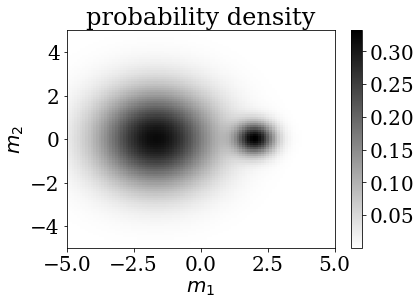

In [419]:
# Define probability density.
def p(x,y):
    
    s1=1.5
    s2=0.5
    return np.exp(-0.5*((x+1.7)**2+y**2)/s1**2)/(2.0*np.pi*s2)+np.exp(-0.5*((x-2.0)**2+y**2)/s2**2)/(2.0*np.pi*s2)

# Plot.
x=np.linspace(-5.0,5.0,100)
y=np.linspace(-5.0,5.0,100)
x,y=np.meshgrid(x,y)

plt.pcolor(x,y,p(x,y),cmap='binary')
plt.colorbar()
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2$')
plt.title('probability density')
plt.show()

# 2. Input parameters

Here we set the most important input parameters. They include a flag for local or global proposals, the proposal radius (only relevant for local proposals), and the total number of samples.

In [425]:
# Make'global' or 'local' proposals.
proposal='local'

# Proposal radius. Only relevant for local proposals.
proposal_radius=2.0

# Number of Metropolis-Hastings samples.
N=1000

# 3. Sampling

Sampling starts by the generation of a random starting point and the evaluation of the probability for that point. We then randomly produce new samples - either by local or global proposals - and subject them to the Metropolis rule. The result is a vector containing all the samples.

In [426]:
# Initialise sample vectors and number of accepted models.
sx=np.zeros(N)
sy=np.zeros(N)
accept=0

# Randomly chosen initial values.
sx[0],sy[0]=10.0*(np.random.rand(2)-0.5)

# Evaluate initial probability density.
p_current=p(sx[0],sy[0])

for it in range(1,N):
    
    # Make a new proposal.
    if proposal=='global':
        sx_prop,sy_prop=10.0*(np.random.rand(2)-0.5)
    elif proposal=='local':
        sx_prop=sx[it-1]+proposal_radius*np.random.randn()
        sy_prop=sy[it-1]+proposal_radius*np.random.randn()
            
    # Evaluate probability of the proposal.
    p_prop=p(sx_prop,sy_prop)
    
    # Compute Metropolis ratio.
    m=p_prop/p_current
    
    # Evaluate Metropolis rule
    if m>np.random.rand():
        sx[it]=sx_prop
        sy[it]=sy_prop
        p_current=p_prop
        accept+=1
    else:
        sx[it]=sx[it-1]
        sy[it]=sy[it-1]

# 4. Output and analysis

Following the sampling, we plot the results and perform some analysis.

acceptance ratio: 0.478000 
effective sample size: 111.111111


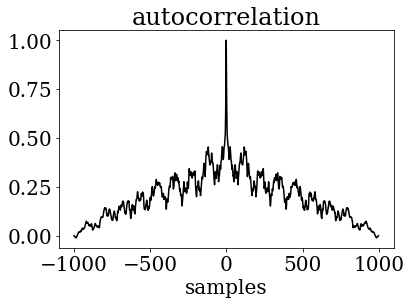

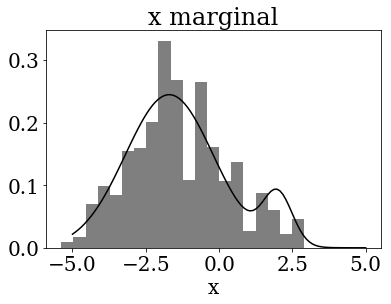

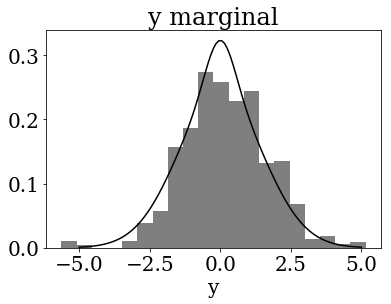

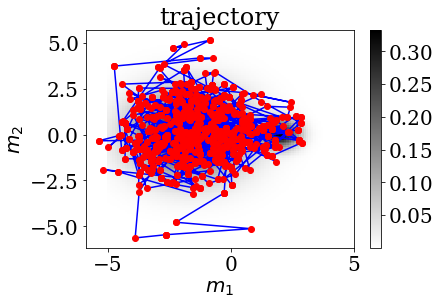

In [428]:
# Acceptance ratio.
print('acceptance ratio: %f ' % (accept/N))

# Estimate of the effective sample size.
cc=np.correlate(sx,sx,'full')/np.sum(sx*sx)
idx=np.where(np.abs(cc-0.5)==np.min(np.abs(cc-0.5)))[0][0]
Neff=N/(np.abs(N-idx))
print('effective sample size: %f' % Neff)

# Plot autocorrelation function.
plt.plot(np.arange(2*N-1)-N,cc,'k')
plt.xlabel('samples')
plt.title('autocorrelation')
plt.show()

# 1D marginals.
P=p(x,y)

px=0.1*np.sum(P,axis=0)
px=10.0*px/np.sum(px)

py=0.1*np.sum(P,axis=1)
py=10.0*py/np.sum(py)

n, bins, patches = plt.hist(sx, 20, density=True, facecolor='k', alpha=0.5)
plt.plot(np.linspace(-5.0,5.0,100),px,'k')
plt.xlabel('x')
plt.title('x marginal')
plt.show()

n, bins, patches = plt.hist(sy, 20, density=True, facecolor='k', alpha=0.5)
plt.plot(np.linspace(-5.0,5.0,100),py,'k')
plt.xlabel('y')
plt.title('y marginal')
plt.show()

# Plot samples.
plt.pcolor(x,y,p(x,y),cmap='binary')
plt.colorbar()
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2$')
plt.plot(sx,sy,'b')
plt.plot(sx,sy,'ro')
plt.title('trajectory')
plt.show()

